In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

1.准备数据

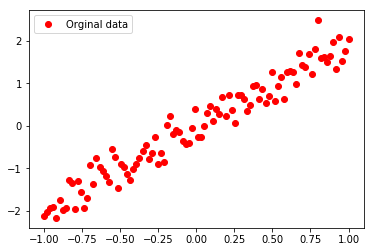

In [2]:
train_X = np.linspace(-1, 1, 100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3
plt.plot(train_X, train_Y, 'ro', label = 'Orginal data')
plt.legend()
plt.show()

2.搭建模型

In [3]:
# 正向搭建模型
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.zeros([1]), name="bias")

z = tf.multiply(X, W) + b

In [4]:
# 反向搭建模型
cost = tf.reduce_mean(tf.square(Y - z))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

3.迭代训练模型

Epoch: 1 cost= 0.56216925 W= [1.0296981] b= [0.26858544]
Epoch: 3 cost= 0.06011435 W= [1.7203714] b= [0.08250938]
Epoch: 5 cost= 0.01651344 W= [1.9075484] b= [0.01200994]
Epoch: 7 cost= 0.009715596 W= [1.956091] b= [-0.00659567]
Epoch: 9 cost= 0.0082503 W= [1.9686446] b= [-0.01141272]
Epoch: 11 cost= 0.007890916 W= [1.9718904] b= [-0.01265827]
Epoch: 13 cost= 0.0077992463 W= [1.9727302] b= [-0.01298042]
Epoch: 15 cost= 0.007775724 W= [1.9729465] b= [-0.01306352]
Epoch: 17 cost= 0.007769586 W= [1.9730029] b= [-0.01308516]
Epoch: 19 cost= 0.007768031 W= [1.9730172] b= [-0.01309064]
 Finished!
cost= 0.07554601 W= [1.9730201] b= [-0.01309169]


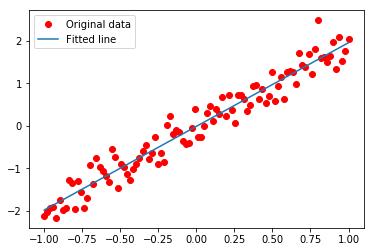

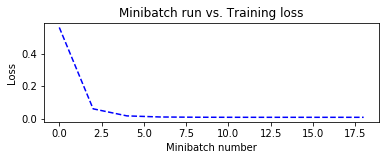

x=0.2，z= [0.38151234]


In [5]:
# 训练模型
plotdata = { "batchsize":[], "loss":[] }
def moving_average(a, w=10):
    if len(a) < w: 
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

# 初始化所有变量
init = tf.global_variables_initializer()
# 定义迭代参数
training_epochs = 20
display_step = 2

with tf.Session() as sess:
    sess.run(init)
    
    # 输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
            
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict = {X:x, Y:y})
            print ("Epoch:", epoch+1, "cost=", loss,"W=", sess.run(W), "b=", sess.run(b))
            if not (loss == "NA" ):
                plotdata["batchsize"].append(epoch)
                plotdata["loss"].append(loss)
    
    print (" Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), "W=", sess.run(W), "b=", sess.run(b))
    
    
    # 训练模型可视化
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata["avgloss"] = moving_average(plotdata["loss"])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata["batchsize"], plotdata["avgloss"], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    plt.show()
    
    # 4.使用模型
    print ("x=0.2，z=", sess.run(z, feed_dict={X: 0.2}))
